In [85]:
#Import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px 
import math 
import statistics as st
from collections import Counter
import scipy.stats as sp
import seaborn as sns 
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

# 1.Preprocesado: 
---
 
*   Convertir todas las variables categóricas a numéricas (gender, ever_married, work_type, residence_type, bmi, smoking_status). 

*   Existen 1544 personas de las que se desconoce si fuman o no; vamos a asignar también un número para esta posibilidad.

*   Existen 201 personas de las que se desconoce su BMI (IMC); vamos a eliminar estos casos para la generación del modelo al tratarse de un bajo porcentaje (4%). 

*   Escalar los datos para su uso por el algoritmo.


In [87]:
from sklearn import preprocessing 
oh = preprocessing.OneHotEncoder()

#Cargo el dataset
url = 'https://raw.githubusercontent.com/juliajjm/modulo6_practica2/main/act1_healthcare-dataset-stroke-data.csv'
df_health = pd.read_csv(url, sep = ',', decimal ='.')
#df_health.head()
#df_health.info()

#Convertir todas las variables categóricas a numéricas (gender, ever_married, work_type, residence_type, bmi, smoking_status). 
#Utilizo OneHotEncoder para transformar las variables 

#Eliminamos los Nan de Bmi (201 valores eliminados de Nan)
df_health.dropna(subset=["bmi"] , inplace = True)
#df_health.info()

enc_df = pd.DataFrame(oh.fit_transform(df_health[['gender']]).toarray() , columns= oh.get_feature_names_out()) 
enc_df1 = pd.DataFrame(oh.fit_transform(df_health[['ever_married']]).toarray() , columns= oh.get_feature_names_out()) 
enc_df2 = pd.DataFrame(oh.fit_transform(df_health[['work_type']]).toarray() , columns= oh.get_feature_names_out()) 
enc_df3 = pd.DataFrame(oh.fit_transform(df_health[['Residence_type']]).toarray() , columns= oh.get_feature_names_out()) 
enc_df4 = pd.DataFrame(oh.fit_transform(df_health[['bmi']]).toarray() , columns= oh.get_feature_names_out()) 
enc_df5 = pd.DataFrame(oh.fit_transform(df_health[['smoking_status']]).toarray() , columns= oh.get_feature_names_out()) 

# merge with main df bridge_df on key values 
df_health_new = df_health.join([enc_df , enc_df1 , enc_df2 , enc_df3, enc_df4 , enc_df5 ]) 
df_health_new.head(200)





,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,bmi_64.8,bmi_66.8,bmi_71.9,bmi_78.0,bmi_92.0,bmi_97.6,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046.0,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,36.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,31112.0,Male,80.0,0.0,1.0,Yes,Private,Rural,105.92,32.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,60182.0,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1665.0,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,56669.0,Male,81.0,0.0,0.0,Yes,Private,Urban,186.21,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,25974.0,Male,78.0,0.0,0.0,Yes,Self-employed,Urban,218.46,26.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
235,1210.0,Female,68.0,0.0,0.0,Yes,Private,Rural,211.06,39.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
236,28493.0,Male,57.0,0.0,0.0,Yes,Private,Urban,86.30,31.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
237,36857.0,Male,77.0,0.0,0.0,Yes,Self-employed,Rural,162.14,32.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Existen 1544 personas de las que se desconoce si fuman o no; vamos a asignar también un número para esta posibilidad. 


In [88]:
#con la operacion de OnehotEncoder ya hemos asignado un número a los que se desconoce si fuman o no 
df_health_new['smoking_status'].isnull().values.any()

df_health_new1 = df_health_new.loc[(df_health_new.smoking_status == "Unknown")]
df_health_new1.head(1500)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,bmi_64.8,bmi_66.8,bmi_71.9,bmi_78.0,bmi_92.0,bmi_97.6,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
9,60491.0,Female,78.0,0.0,0.0,Yes,Private,Urban,58.57,24.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23,64778.0,Male,82.0,0.0,1.0,Yes,Private,Rural,208.30,32.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31,33879.0,Male,42.0,0.0,0.0,Yes,Private,Rural,83.41,25.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
38,47306.0,Male,58.0,0.0,0.0,No,Private,Rural,92.62,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
67,72366.0,Male,76.0,0.0,0.0,Yes,Private,Urban,104.47,20.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5098,579.0,Male,9.0,0.0,0.0,No,children,Urban,71.88,17.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5101,36901.0,Female,45.0,0.0,0.0,Yes,Private,Urban,97.95,24.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5103,22127.0,Female,18.0,0.0,0.0,No,Private,Urban,82.85,46.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5104,14180.0,Female,13.0,0.0,0.0,No,children,Rural,103.08,18.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Primero transformo las variables categoricas a numéricas utilizando OneHotEncoder. Sin embargo la transformación de OneHotEncoder me da muchos problemas para escalar las variables. Por este motivo decido utilizar la transformación de LabelEncoder.

In [89]:
#Para poder escalar transformo las variables con  LabelEncoder()
#Transformamos las variables categoricas a numericas 
#(gender, ever_married, work_type, residence_type, bmi, smoking_status)
#usamos LabelEncoder
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

df_health.gender = le.fit_transform(df_health.gender)
df_health.ever_married = le.fit_transform(df_health.ever_married)
df_health.work_type = le.fit_transform(df_health.work_type)
df_health.Residence_type = le.fit_transform(df_health.Residence_type)
df_health.bmi = le.fit_transform(df_health.bmi)
df_health.smoking_status = le.fit_transform(df_health.smoking_status)

df_health.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,239,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,198,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,217,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,113,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,163,1,1


Escalar los datos para su uso por el algoritmo.
Antes de escalar los datos, creamos otro dataset y eliminamos las columnas categoricas, solo dejamos las numericas

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit(df_health.iloc[:,0:-1]).transform(df_health.iloc[:,0:-1])

In [91]:
dfs = pd.DataFrame(scaled, columns=df_health.columns[:-1])
dfs.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,-1.334653,1.198428,1.070138,-0.318067,4.381968,0.729484,-0.155697,0.985640,2.777698,1.037393,-0.351788
1,-0.283539,1.198428,1.646563,-0.318067,4.381968,0.729484,-0.155697,-1.014569,0.013842,0.491474,0.585232
2,1.101211,-0.833023,0.272012,-0.318067,-0.228208,0.729484,-0.155697,0.985640,1.484132,0.744461,1.522252
3,-1.686247,-0.833023,1.602222,3.143994,-0.228208,0.729484,0.759651,-1.014569,1.549193,-0.640310,0.585232
4,0.933870,1.198428,1.690903,-0.318067,-0.228208,0.729484,-0.155697,0.985640,1.821368,0.025445,-0.351788


In [92]:
dfs = pd.concat([dfs, df_health["stroke"]], axis=1)
#dfs.head()
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5101 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   float64
 1   gender             4909 non-null   float64
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   float64
 4   heart_disease      4909 non-null   float64
 5   ever_married       4909 non-null   float64
 6   work_type          4909 non-null   float64
 7   Residence_type     4909 non-null   float64
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   float64
 11  stroke             4909 non-null   float64
dtypes: float64(12)
memory usage: 518.1 KB


Dado que solo hay un total de 384 NaN (el 7.5% de la muestra), decido eliminarlos para poder proesguir con el modelo y evitar futuros problemas.

In [93]:
#Eliminamos los NaN de Bmi (201 valores eliminados de Nan)
dfs.dropna(subset=["bmi"] , inplace = True)

#Eliminamos los NaN de stroke 
dfs.dropna(subset=["stroke"] , inplace = True)

dfs.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 4717 entries, 0 to 4908
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4717 non-null   float64
 1   gender             4717 non-null   float64
 2   age                4717 non-null   float64
 3   hypertension       4717 non-null   float64
 4   heart_disease      4717 non-null   float64
 5   ever_married       4717 non-null   float64
 6   work_type          4717 non-null   float64
 7   Residence_type     4717 non-null   float64
 8   avg_glucose_level  4717 non-null   float64
 9   bmi                4717 non-null   float64
 10  smoking_status     4717 non-null   float64
 11  stroke             4717 non-null   float64
dtypes: float64(12)
memory usage: 479.1 KB


# 2.Generar un modelo con el algoritmo de KNN. 
---

El algoritmo de KNN es uno de los más sencillos que hay en cuanto a su funcionamiento interno. Su objetivo es encontrar las muestras (filas de nuestro dataset) más cercanas por sus caracteríticas a la muestra objetivo.

In [94]:
X = dfs.iloc[:,0:-1]
Y = dfs.iloc[:,-1]

# Accuracy
---

In [95]:
#Vamos a calcular el valor de K que mejor "accuracy" tiene
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score

In [96]:
preds_list = []
score_list = []
k_list = []

for k in list(range(1, 12, 2)):
  knn_model = KNeighborsClassifier(n_neighbors=k, weights="uniform", metric="minkowski")
  preds = cross_val_predict(knn_model, X, Y, cv=3, method="predict", n_jobs=3)
  score = cross_val_score(knn_model, X, Y, cv=3, scoring="accuracy")
  k_list.append(k)
  preds_list.append(preds)
  score_list.append(score.mean())

In [97]:
df_scores = pd.DataFrame({"K":k_list, 
                   "score":score_list
                   })

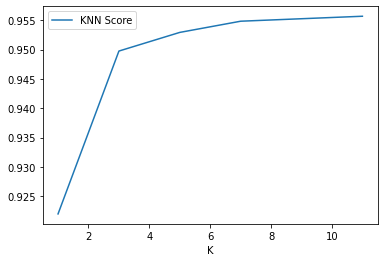

In [98]:
df_scores.set_index("K")["score"].plot(label="KNN Score")
plt.legend()
plt.show();

Conclusiones gráfico
---
Si observamos los valores de K, al principio tenemos un valor de accuracy más o menos bajo. La zona de mayor accuracy esta en el valor de K 10.

# 3. Entrenamiento y Evaluación del modelo
---

cross_val_predict: nos va a dar la predicción 

cross_val_score: introducimos los valores de accuracy

Para cada uno de ellos nos da un accuracy de 0.95, 0.95 y 0.96

In [99]:
knn_model = KNeighborsClassifier(n_neighbors=7, weights="uniform", metric="minkowski")
preds = cross_val_predict(knn_model, X, Y, cv=3, method="predict", n_jobs=3)
score = cross_val_score(knn_model, X, Y, cv=3, scoring="accuracy", n_jobs=3)
score

array([0.95422759, 0.95483461, 0.95547074])

In [101]:
#Lanzamos la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, preds)

##          predicciones
##            0      1
##       0   TN     FP
## real
##       1   FN     TP

array([[4504,    4],
       [ 209,    0]])

Conclusiones matriz de confusión
---
Las personas que han tenido stroke reales se corresponden con los valores de la fila de a bajo (209 , 0). Hay 209 que nosotros hemos estimado que no son stroke. Es relevante destacar que nos estamos dejando personas que tendran stroke y que nosotros no los vamos a detectar. Por otro lado, el valor 0 corresponde a los que nosotros predecimos/estimamos que si que tienen stroke, hay 4 que no han tenido stroke.
El accuracy obtenido es bastante alto pero es importante tener en cuenta esta problemática.

# Recall, Precision y F1-Score
---

Analizamos las metricas de Recall & Precision.
Cuando miramos la matriz de confusión de los 209 positivos de stroke (la suma de 209 + 0) no acierta ningun caso, valor 0. Este 0% es el Recall.
Y en cuento a la métrica de Precision, de todos los casos donde hay stroke esta acertando 0 de 4 casos totales, con lo cual la precisión es nula.

In [103]:
#Hay que calcular las Matriz de Confusión siempre, y con más razón cuando el dataset esté desbalanceado
from sklearn.metrics import classification_report
print(f"Informe de Clasificación:\n"
      f"{classification_report(Y, preds)}")

Informe de Clasificación:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      4508
         1.0       0.00      0.00      0.00       209

    accuracy                           0.95      4717
   macro avg       0.48      0.50      0.49      4717
weighted avg       0.91      0.95      0.93      4717



Hay otra forma de calcular todo esto que es con el classification_report. Nosotros nos fijamos en los valores de precision y recall (0.00 , 0.00) de la segunda fila (1.0). La metrica que une estos dos valores es el f1 score.

In [105]:
#Calculamos tanto probabilidades como predicts
knn_model = KNeighborsClassifier(n_neighbors=12, weights="uniform", metric="minkowski")
probs = cross_val_predict(knn_model, X, Y, cv=3, method="predict_proba", n_jobs=3)
preds = cross_val_predict(knn_model, X, Y, cv=3, method="predict", n_jobs=3)

In [107]:
probs  

array([[0.91666667, 0.08333333],
       [0.91666667, 0.08333333],
       [0.83333333, 0.16666667],
       ...,
       [1.        , 0.        ],
       [0.91666667, 0.08333333],
       [0.91666667, 0.08333333]])

In [108]:
probs[:,1]

array([0.08333333, 0.08333333, 0.16666667, ..., 0.        , 0.08333333,
       0.08333333])

In [109]:
df_dict = {"prob_class0": probs[:,0],
           "prob_class1": probs[:,1],
           "preds":preds}

In [110]:
df_probs = pd.DataFrame(df_dict)
df_probs.head()

,prob_class0,prob_class1,preds
0,0.916667,0.083333,0.0
1,0.916667,0.083333,0.0
2,0.833333,0.166667,0.0
3,0.833333,0.166667,0.0
4,1.000000,0.000000,0.0


In [111]:
df_probs[df_probs["preds"]==1]["prob_class0"].max()

nan

In [67]:
from sklearn.metrics import precision_recall_curve
precision, recall, limite = precision_recall_curve(Y,probs[:,1])

In [112]:
precision

array([0.04430782, 0.0730198 , 0.09807692, 0.11515152, 0.12765957,
       0.09090909, 0.        , 1.        ])

In [113]:
recall

array([1.        , 0.5645933 , 0.24401914, 0.09090909, 0.02870813,
       0.00478469, 0.        , 0.        ])

In [114]:
limite

array([0.        , 0.08333333, 0.16666667, 0.25      , 0.33333333,
       0.41666667, 0.5       ])

# Curva Precision vs Recall

---

Con la curva Precision vs Recall vamos a decidir a partir de que probabilidad vamos a querer que sea 0 o que sea 1.

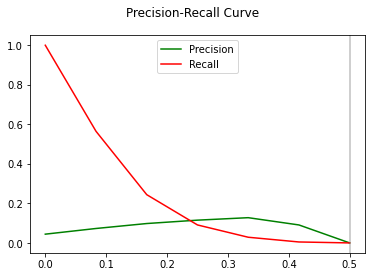

In [71]:
plt.plot(limite, precision[:-1], c="green", label="Precision")
plt.plot(limite, recall[:-1], c="red", label="Recall")
plt.axvline(0.5, alpha=0.5, c="gray")
plt.suptitle("Precision-Recall Curve")
plt.legend()
plt.show()

Conclusiones 
---
Observo que el Recall y Precision van una en contra de la otra. Si el límite esta en 0.5 (por defecto en KNN) nos encontramos con un Recall de 0 y un Precision de 0, valores que coinciden con los valores obtenidos anteriormente.

In [72]:
df_probs["preds_10"] = 0
df_probs["preds_20"] = 0
df_probs["preds_30"] = 0

df_probs.loc[df_probs["prob_class1"]>0.1, "preds_10"] = 1
df_probs.loc[df_probs["prob_class1"]>0.2, "preds_20"] = 1
df_probs.loc[df_probs["prob_class1"]>0.3, "preds_30"] = 1

In [ ]:
df_probs

In [74]:
confusion_matrix(Y, df_probs["preds_10"].values)

##          predicciones
##            0      1
##       0   TN     FP
## real
##       1   FN     TP

array([[4039,  469],
       [ 158,   51]])

In [75]:
confusion_matrix(Y, df_probs["preds_20"].values)

array([[4362,  146],
       [ 190,   19]])

In [76]:
confusion_matrix(Y, df_probs["preds_30"].values)

array([[4467,   41],
       [ 203,    6]])

# ROC-Curve (AUC)

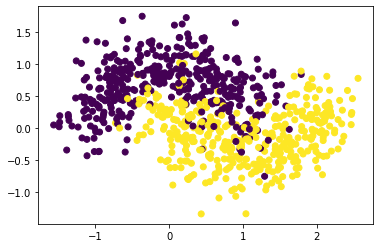

In [115]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=800, noise=0.3, random_state=42)
plt.scatter(x=X[:,0], y=X[:,1], c=y)
plt.show()

(640, 2) (640,)
(160, 2) (160,)


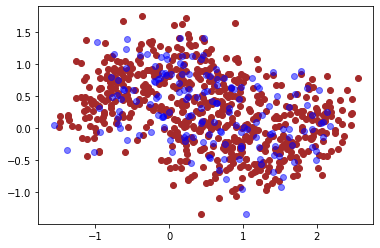

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

plt.scatter(x=X_train[:,0], y=X_train[:,1], c="brown")
plt.scatter(x=X_test[:,0], y=X_test[:,1], c="blue", alpha=0.5)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


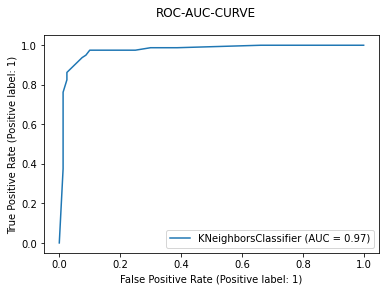

In [117]:
from sklearn.metrics import plot_roc_curve
knn_model = KNeighborsClassifier(n_neighbors=19, weights="uniform", metric="minkowski")
knn_model.fit(X_train, y_train)
plot_roc_curve(knn_model, X_test, y_test)
plt.suptitle("ROC-AUC-CURVE")
plt.show()

In [118]:
#valores de predict_proba
knn_model.predict_proba(X_test)[0:10]

array([[0.05263158, 0.94736842],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.05263158, 0.94736842],
       [0.47368421, 0.52631579],
       [0.94736842, 0.05263158],
       [0.        , 1.        ],
       [0.68421053, 0.31578947],
       [0.73684211, 0.26315789],
       [0.05263158, 0.94736842]])

In [119]:
#Calculo del ROC (AUC) con predict_proba
from sklearn.metrics import roc_auc_score
print (roc_auc_score(y_test, knn_model.predict_proba(X_test)[:,0]))
print (roc_auc_score(y_test, knn_model.predict_proba(X_test)[:,1]))

0.026406249999999975
0.97359375


Conclusiones ROC-Curve (AUC)
---
El área bajo la curva nos da 0.97, esto nos indica que el modelo tiene una buena capacidad predictiva. Valores contradictorios con el precision y recall obtenidos anteriormente.

Lo que nos mide la curva ROC es que dados todos los cortes desde el 0 hasta el 1, en cada uno de los intervalos vamos a medir la especificidad y la sensibilidad. Esto nos va a dar un área que es el área bajo la curva ROC (AUC). Lo cual quiere decir que cuanto
mayor sea nuestra área, mayor será la capacidad predictiva del modelo.



# **Confusion Matrix**
---


In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=21, weights="uniform", metric="minkowski")
knn_model.fit(X_train, y_train)
pred_train = knn_model.predict(X_train)
pred_test = knn_model.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*knn_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*knn_model.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 92.03
Precisión sobre los datos de test: 93.75


In [83]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_test, pred_test)

array([[75,  5],
       [ 5, 75]])

Confusion matrix:



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


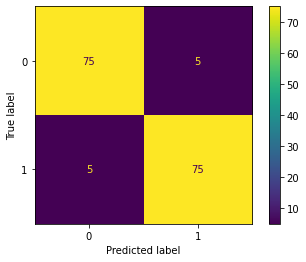

In [84]:
print(f"Confusion matrix:\n")
disp = plot_confusion_matrix(knn_model, X_test, y_test, cmap=plt.cm.viridis,)
plt.show()